In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold


from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn import svm 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [2]:
#Read Subset 30 Data
dataset = pd.read_csv("/Users/mourin/Study/Courses/6180/Project/CICMalAnal2017/Data-Exploration/merged_dataset_30.csv",low_memory=False)
dataset.shape

(1534228, 86)

In [3]:
#Group by Datatypes
dtypes_by_group = dataset.columns.to_series().groupby(dataset.dtypes).groups
print(dtypes_by_group)

{int64: ['Unnamed: 0'], float64: [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK F

In [4]:
#Remove Spaces from Column Name
dataset.columns = dataset.columns.str.strip()

In [5]:
#Drop First 2 unnamed column
dataset = dataset.drop([dataset.columns[0],dataset.columns[1]], axis=1)

#Drop Duplicate columns
dataset.drop_duplicates(keep=False, inplace=True)

dataset.shape


(1534156, 84)

In [6]:
dataset.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,104.208.31.113,443.0,10.42.0.151,54307.0,6.0,14/06/2017 02:59:53,80669.0,2.0,0.0,453.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SELFMITE
1,10.42.0.151,54307.0,104.208.31.113,443.0,6.0,14/06/2017 02:59:54,14746.0,2.0,0.0,85.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SELFMITE
2,31.13.71.1,443.0,10.42.0.151,38606.0,6.0,14/06/2017 03:00:01,31.0,2.0,0.0,42.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SELFMITE
3,10.42.0.151,38606.0,31.13.71.1,443.0,6.0,14/06/2017 03:00:01,19370.0,3.0,0.0,42.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SELFMITE
4,10.42.0.151,54062.0,172.217.0.234,443.0,6.0,14/06/2017 03:00:03,22273.0,1.0,1.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SELFMITE


In [7]:
#Check null label status
print(dataset['Label'].value_counts())
print(len(dataset['Label'].value_counts()))
print(dataset['Label'].isnull().sum())

BENIGN                       127859
ADWARE_GOOLIGAN               93772
ADWARE_FEIWO                  56632
SCAREWARE_ANDROIDDEFENDER     56440
RANSOMWARE_SVPENG             54161
RANSOMWARE_PORNDROID          46082
SCAREWARE_FAKEAPPAL           44563
RANSOMWARE_KOLER              44555
SMSMALWARE_NANDROBOX          44517
ADWARE_EWIND                  43374
SCAREWARE_AVFORANDROID        42448
SCAREWARE_AVPASS              40776
SCAREWARE_FAKEAV              40089
RANSOMWARE_RANSOMBO           39859
SMSMALWARE_PLANKTON           39765
ADWARE_DOWGIN                 39682
RANSOMWARE_CHARGER            39551
ADWARE_SHUANET                39271
ADWARE_KEMOGE                 38771
RANSOMWARE_SIMPLOCKER         36340
ADWARE_YOUMI                  36035
SCAREWARE_FAKEAPP             34676
SMSMALWARE_BIIGE              33678
SMSMALWARE_SMSSNIFFER         33618
SCAREWARE_FAKETAOBAO          33299
RANSOMWARE_WANNALOCKER        32701
ADWARE_KOODOUS                32547
ADWARE_MOBIDASH             

In [8]:
#Drop Rows with missing Label
dataset.dropna(subset=['Label'], inplace=True)
dataset.shape

(1534145, 84)

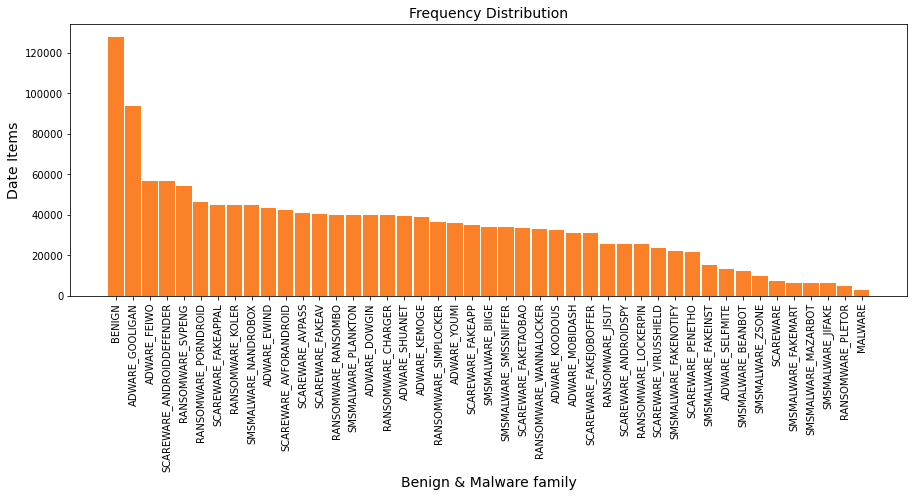

In [9]:
#Draw plot 
plt.figure(figsize=(15, 5))
countOfAllLabel = dataset['Label'].value_counts()
plt.bar(countOfAllLabel.index, countOfAllLabel.values, color ='#fa8128',width = 0.9)
plt.title('Frequency Distribution', fontsize=14)
plt.ylabel('Date Items', fontsize=14)
plt.xlabel('Benign & Malware family', fontsize=14)
plt.xticks(rotation=90)
plt.show()

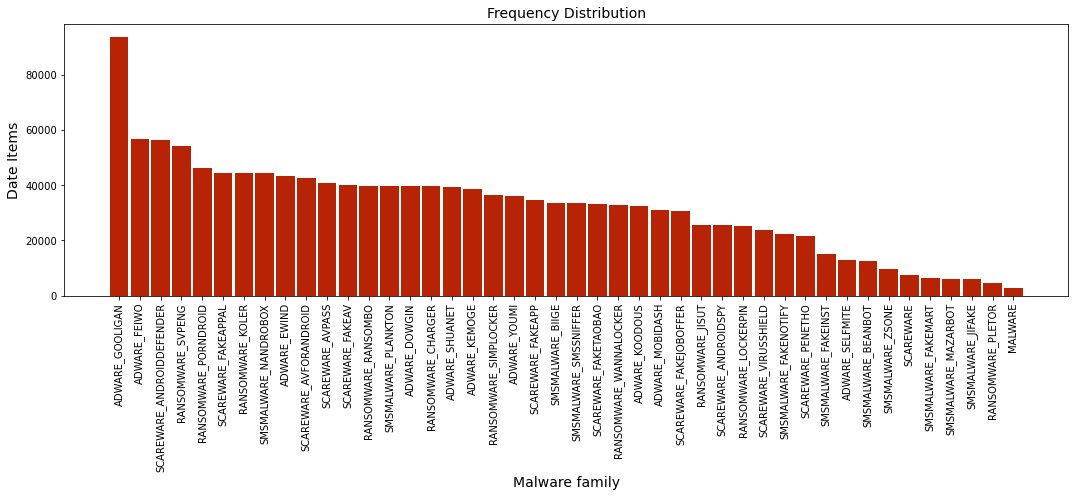

In [10]:
#Draw plot for Malware Family Only 
plt.figure(figsize=(18, 5))
onlyMalwareFamilyDataset = dataset[dataset.Label != 'BENIGN']
countOfAllMalwareFamily = onlyMalwareFamilyDataset['Label'].value_counts()
plt.bar(countOfAllMalwareFamily.index, countOfAllMalwareFamily.values, color ='#B62405',width = 0.9)
plt.title('Frequency Distribution', fontsize=14)
plt.ylabel('Date Items', fontsize=14)
plt.xlabel('Malware family', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [11]:
#Benign/Malware Family wise five summary
dataset.groupby('Label').describe()


Source Port                                   \
                                count          mean           std  min   
Label                                                                    
ADWARE_DOWGIN                 39682.0  40043.293105  17402.518560  0.0   
ADWARE_EWIND                  43374.0  39083.669941  18267.787050  0.0   
ADWARE_FEIWO                  56632.0  38916.548082  18108.401342  0.0   
ADWARE_GOOLIGAN               93772.0  40954.048607  16729.517532  0.0   
ADWARE_KEMOGE                 38771.0  38161.758015  18865.775081  0.0   
ADWARE_KOODOUS                32547.0  38743.649369  18344.636877  0.0   
ADWARE_MOBIDASH               31034.0  39444.429529  18144.458758  0.0   
ADWARE_SELFMITE               13029.0  38977.214982  17798.921085  0.0   
ADWARE_SHUANET                39271.0  38973.331415  18161.262541  0.0   
ADWARE_YOUMI                  36035.0  39531.253753  18001.830545  0.0   
BENIGN                       127859.0  38473.014391  18683.496014  0.0   
MALWARE                        2828.0  39475.844413  16871.247757  0.0   
RANSOMWARE_CHARGER            39551.0  39000.248413  18478.487413  0.0   
RANSOMWARE_JISUT              25672.0  38786.338034  18725.608455  0.0   
RANSOMWARE_KOLER              44555.0  39754.902570  17935.147433  0.0   
RANSOMWARE_LOCKERPIN          25307.0  38645.205200  18945.873587  0.0   
RANSOMWARE_PLETOR              4715.0  22155.097349  22781.214889  0.0   
RANSOMWARE_PORNDROID          46082.0  39131.789202  18136.570783  0.0   
RANSOMWARE_RANSOMBO           39859.0  38757.740360  18233.607120  0.0   
RANSOMWARE_SIMPLOCKER         36340.0  39019.479994  18103.412651  0.0   
RANSOMWARE_SVPENG             54161.0  38127.225605  18938.582052  0.0   
RANSOMWARE_WANNALOCKER        32701.0  39328.113758  18137.540630  0.0   
SCAREWARE                      7358.0  39571.240283  17513.578547  0.0   
SCAREWARE_ANDROIDDEFENDER     56440.0  38661.142931  18624.090585  0.0   
SCAREWARE_ANDROIDSPY          25414.0  39449.616314  18130.569297  0.0   
SCAREWARE_AVFORANDROID        42448.0  39150.098356  17899.300748  0.0   
SCAREWARE_AVPASS              40776.0  39575.967603  17842.623895  0.0   
SCAREWARE_FAKEAPP             34676.0  39319.232236  18323.254921  0.0   
SCAREWARE_FAKEAPPAL           44563.0  38858.838947  17913.385564  0.0   
SCAREWARE_FAKEAV              40089.0  39635.352166  17552.359906  0.0   
SCAREWARE_FAKEJOBOFFER        30683.0  39334.233550  17982.697869  0.0   
SCAREWARE_FAKETAOBAO          33299.0  39537.156371  17707.685300  0.0   
SCAREWARE_PENETHO             21631.0  39372.732421  17657.383498  0.0   
SCAREWARE_VIRUSSHIELD         23716.0  41111.356679  16417.798457  0.0   
SMSMALWARE_BEANBOT            12371.0  39038.168539  17964.981659  0.0   
SMSMALWARE_BIIGE              33678.0  40621.993824  16888.113848  0.0   
SMSMALWARE_FAKEINST           15026.0  40191.910156  17408.428803  0.0   
SMSMALWARE_FAKEMART            6401.0  42684.224652  15236.708776  0.0   
SMSMALWARE_FAKENOTIFY         22197.0  39173.821778  17949.860190  0.0   
SMSMALWARE_JIFAKE              5993.0  41690.925246  15827.110429  0.0   
SMSMALWARE_MAZARBOT            6065.0  37268.035779  19910.400073  0.0   
SMSMALWARE_NANDROBOX          44517.0  38509.770941  18374.470412  0.0   
SMSMALWARE_PLANKTON           39765.0  37997.230152  18688.343800  0.0   
SMSMALWARE_SMSSNIFFER         33618.0  37945.234517  19032.277679  0.0   
SMSMALWARE_ZSONE               9644.0  38048.902737  18884.689382  0.0   

                                                                 \
                                25%      50%       75%      max   
Label                                                             
ADWARE_DOWGIN              34891.00  43640.5  52896.00  65516.0   
ADWARE_EWIND               34366.25  43483.5  52655.50  65532.0   
ADWARE_FEIWO               34492.75  42936.5  52496.00  65531.0   
ADWARE_GOOLIGAN            35439.00  44646.0  54277.00  65529.0   
ADWA

In [12]:
#Group by Datatypes
dtypes_by_group = dataset.columns.to_series().groupby(dataset.dtypes).groups
print(dtypes_by_group)

{float64: ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Average Packet

In [13]:
# Convert Object type dtype Change :: object: ['Flow ID', ' Source IP', 
# ' Destination IP', ' Timestamp', ' Flow IAT Min', ' Packet Length Std', 
# ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Label']

label_encoder = LabelEncoder()
dataset['Source IP'] = label_encoder.fit_transform(dataset['Source IP'].astype(str))
dataset['Destination IP'] = label_encoder.fit_transform(dataset['Destination IP'].astype(str))
dataset['Flow IAT Min'] = label_encoder.fit_transform(dataset['Flow IAT Min'].astype(str))
dataset['Packet Length Std'] = pd.to_numeric(dataset['Packet Length Std'], errors='coerce')
dataset['CWE Flag Count'] = pd.to_numeric(dataset['CWE Flag Count'], errors='coerce')
dataset['Fwd Avg Bytes/Bulk'] = label_encoder.fit_transform(dataset['Fwd Avg Bytes/Bulk'].astype(str))
dataset['Down/Up Ratio'] = label_encoder.fit_transform(dataset['Fwd Avg Bytes/Bulk'].astype(str))
dataset = dataset.drop(columns=["Timestamp"])

#Group by Datatypes
dtypes_by_group = dataset.columns.to_series().groupby(dataset.dtypes).groups
print(dtypes_by_group)

{int64: ['Source IP', 'Destination IP', 'Flow IAT Min', 'Down/Up Ratio', 'Fwd Avg Bytes/Bulk'], float64: ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Fl

In [14]:

#convert Label Datatype and transform to unique array
dataset['Label'] = label_encoder.fit_transform(dataset['Label'])
dataset.Label.unique()

array([ 7,  5,  4,  3,  6,  9,  0,  1,  2,  8, 10, 19, 15, 12, 18, 14, 21,
       20, 16, 17, 13, 30, 25, 26, 29, 27, 32, 11, 31, 28, 24, 33, 23, 39,
       38, 22, 41, 40, 35, 42, 43, 37, 36, 44, 34])

In [15]:
dataset.shape

(1534145, 83)

In [16]:
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te


# classifiers = ['LinearSVM', 'RadialSVM', 
#                'Logistic',  'RandomForest', 
#                'AdaBoost',  'DecisionTree', 
#                'KNeighbors','GradientBoosting']

# models = [DecisionTreeClassifier(random_state=0),
#           RandomForestClassifier(n_estimators=200, random_state=0),
#           svm.SVC(kernel='linear'),
#           svm.SVC(kernel='rbf'),
#           LogisticRegression(max_iter = 1000),
#           AdaBoostClassifier(random_state = 0),
#           KNeighborsClassifier(),
#           GradientBoostingClassifier(random_state=0)]



def acc_score(df,label,classifiers,models):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

        
def plot2(df,l1,l2,p1,p2,c = "b"):
    feat = []
    feat = df.columns.tolist()
    feat = feat[1:]
    plt.figure(figsize = (16, 18))
    for j in range(0,df.shape[0]):
        value = []
        k = 0
        for i in range(1,len(df.columns.tolist())):
            value.append(df.iloc[j][i])
        plt.subplot(4, 4,j+1)
        ax = sns.pointplot(x=feat, y=value,color = c )
        plt.text(p1,p2,df.iloc[j][0])
        plt.xticks(rotation=90)
        ax.set(ylim=(l1,l2))
        k = k+1
        

def highlight_max(data, color='aquamarine'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [17]:
#Feature Selection using Pearson's Correlation

all_corr=dataset.corr()['Label'].abs() >= .02
highly_correlated =all_corr[all_corr==True].index
highly_correlated= highly_correlated.tolist() 
highly_correlated.remove('Label')
print('The number of features removed out of', all_corr.size, 'is', all_corr.size- len(highly_correlated),', leaving',len(highly_correlated),'selected features.')
highly_correlated


The number of features removed out of 83 is 51 , leaving 32 selected features.


['Source IP',
 'Destination IP',
 'Flow Duration',
 'Total Fwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd PSH Flags',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'SYN Flag Count',
 'Down/Up Ratio',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Fwd Avg Bytes/Bulk',
 'Subflow Fwd Packets',
 'Init_Win_bytes_backward',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [18]:
featureName = dataset["Label"]
datasetToTrain =  dataset[highly_correlated]

In [39]:
%%time

#Decision Tree

classifiersDT = ['DecisionTree']
modelsDT = [DecisionTreeClassifier(random_state=0)]

scoreDT = acc_score(datasetToTrain,featureName,classifiersDT,modelsDT)
scoreDT


CPU times: user 1min 7s, sys: 1.24 s, total: 1min 8s
Wall time: 1min 8s


,Classifier,Accuracy
0,DecisionTree,0.27715


In [40]:
%%time

#AdaBoost

classifiersAB = ['AdaBoost']
modelsAB = [AdaBoostClassifier(random_state = 0)]

scoreAB = acc_score(datasetToTrain,featureName,classifiersAB,modelsAB)
scoreAB

CPU times: user 3min 20s, sys: 38.9 s, total: 3min 59s
Wall time: 4min 1s


,Classifier,Accuracy
0,AdaBoost,0.087304


In [41]:
%%time

#Logistic

classifiersLG = ['Logistic']
modelsLG = [LogisticRegression(max_iter = 1000)]

scoreLG = acc_score(datasetToTrain,featureName,classifiersLG,modelsLG)
scoreLG

CPU times: user 34min 5s, sys: 12min 36s, total: 46min 42s
Wall time: 28min 44s


,Classifier,Accuracy
0,Logistic,0.119094


In [42]:
%%time

#Naive Bayes

classifiersNB = ['Naive Bayes']
modelsNB = [MultinomialNB()]

scoreNB = acc_score(datasetToTrain,featureName,classifiersNB,modelsNB)
scoreNB

CPU times: user 3.26 s, sys: 1.52 s, total: 4.78 s
Wall time: 3.76 s


,Classifier,Accuracy
0,Naive Bayes,0.113299


In [43]:
%%time

#RandomForest

classifiersRF = ['RandomForest']
modelsRF = [RandomForestClassifier(n_estimators=200, random_state=0)]

scoreRF = acc_score(datasetToTrain,featureName,classifiersRF,modelsRF)
scoreRF

CPU times: user 23min 29s, sys: 1min 59s, total: 25min 29s
Wall time: 26min 11s


,Classifier,Accuracy
0,RandomForest,0.277247


In [ ]:
%%time

#KNeighbors

classifiersKN = ['KNeighbors']
modelsKN = [KNeighborsClassifier()]

scoreKN = acc_score(datasetToTrain,featureName,classifiersKN,modelsKN)
scoreKN

In [ ]:
%%time

#RadialSVM

classifiersRSVM = ['RadialSVM']
modelsRSVM = [svm.SVC(kernel='rbf')]

scoreRSVM = acc_score(datasetToTrain,featureName,classifiersRSVM,modelsRSVM)
scoreRSVM